In [59]:
from bs4 import BeautifulSoup
import requests
import lxml.html as lh
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import time
import geopandas as gpd
import shapely
from shapely.geometry import shape,mapping, Point, Polygon, MultiPolygon

#output 7 day average COVID-19 Cases in LA by region

pd.options.display.max_rows = 999
pd.set_option('display.max_rows', 200)

# file_path = '/Users/j5/Documents/repo/covid/'
# file_path = '/Users/J3/Downloads/repo/covid/'

# output_file_path = '/Users/J3/Downloads/repo/covid/output_files/'
# input_file_path = '/Users/J3/Downloads/repo/covid/input_files/'
# file_path_shp = '/Users/J3/Downloads/repo/covid/la-county-regions-current/'

output_file_path = '/Users/j6/Documents/repo/covid/output_files/'
input_file_path = '/Users/j6/Documents/repo/covid/input_files/'
file_path_shp = '/Users/j6/Documents/repo/covid/la-county-regions-current/'

In [60]:
column_names = ['u', 'ds']
ul = pd.read_csv(input_file_path+"url_list.csv"
                 , skiprows = 1
                 , names = column_names
                )

In [61]:
column_names = ['neighborhood', 'lat', 'long']
lat_long = pd.read_csv(input_file_path+"covid Los Angeles 20200318 - city_lat_long_b.csv"

                 , skiprows = 1
                 , names = column_names
                )

In [89]:
column_names = ['region', 'population_2010']
pop = pd.read_csv(input_file_path+"population_la_region_20200516.csv"
                 , skiprows = 1
                 , names = column_names
                )

In [63]:
column_names = ['neighborhood','current_cases','lat', 'long', 'ds']
df_old = pd.read_csv(input_file_path+"covid Los Angeles 20200318 - LA_by_community_2020509.csv"

                 , skiprows = 1
                 , names = column_names
                )
df_old['ds'] = pd.to_datetime(df_old['ds'])
df_old = df_old[df_old['ds'] < '2020-03-30']
df_old[df_old['current_cases'] > 0]
df_old = df_old[~df_old['neighborhood'].str.lower().str.contains('invest')]
df_old = df_old.drop(['lat', 'long'],1)

# pd.pivot_table(df_old, index = ['ds'], aggfunc=len)
#remove under investigation
#greater than 0 
#before 3/30
#remove lat / long

In [64]:
appended_data_list = []
appended_data_list_b = []
#df = pd.DataFrame([])

# for i, row in ul[ul['ds'] >= '2020-03-30'].iterrows():
for i, row in ul[(ul['ds'] >= '2020-03-30') &(ul['ds'] != '2020-05-02') ].iterrows():
    print(row['u'])
    url = row['u']
    print(row['ds'])
    reqs = requests.get(url)
    soup = BeautifulSoup(reqs.text, 'lxml')
    soup.find_all("li")
    l = []
    
    for tag in soup.find_all("li"):
        l.append(tag.text)
    
    df=pd.DataFrame(l, columns = ["name"])
    dfp=pd.DataFrame(l, columns = ["name"])
    
    dfp=dfp[dfp['name'].str.contains("Long Beach -- |Pasadena --")]
    dfp=dfp[~dfp['name'].str.contains("Avoid")]
    dfp['name'] = dfp['name'].str.replace('--', '\t')
    dfp[['A','B']]=dfp.name.apply(lambda x: pd.Series(str(x).split("\t"))) 
    dfp[["B"]] = dfp[["B"]].apply(pd.to_numeric, errors = 'coerce', axis = 1)
    dfp=dfp[['A','B']]
    dfp['A'] = dfp['A'].str.strip()
    dfp['ds'] = pd.to_datetime(row['ds'])
    appended_data_list.append(dfp)
    
    df=df[df['name'].str.contains("Unincorporated -|City of|Los Angeles -")]
    df=df[~df['name'].str.contains("Avoid")]
    df = df[~df['name'].isin(['Pasadena', 'Long Beach'])]
    df[['A','B','C','D','E','F']] = df.name.apply(lambda x: pd.Series(str(x).split("\t"))) 
    df = df[['A','B','D']]
    df['A'] = df['A'].str.replace('City of ', '')
    df['A'] = df['A'].str.replace('Unincorporated - ', '')
    df['A'] = df['A'].str.replace('Los Angeles - ', '')
    df['A'] = df['A'].str.replace('*', '')
    df['A'] = df['A'].str.strip()
    df['B'] = df['B'].str.replace('--', '0')
    df['D'] = df['D'].str.replace('--', '0')
    df[["B", "D"]] = df[["B", "D"]].apply(pd.to_numeric, errors = 'coerce', axis = 1)
    df=pd.pivot_table(df, index = ["A"], values = ["B","D"], aggfunc={"D":np.max, "B":np.sum}).reset_index()    
    df['ds'] = pd.to_datetime(row['ds'])
    appended_data_list_b.append(df)
    #time.sleep(1) # Sleep for 3 seconds
 
df_final = pd.concat(appended_data_list_b)
df_final
dfp_final = pd.concat(appended_data_list)

df_final=df_final.append(dfp_final).reset_index()
print(df_final)

http://publichealth.lacounty.gov/phcommon/public/media/mediapubdetail.cfm?unit=media&ou=ph&prog=media&cur=cur&prid=2381&row=25&start=1
2020-05-16
http://publichealth.lacounty.gov/phcommon/public/media/mediapubdetail.cfm?unit=media&ou=ph&prog=media&cur=cur&prid=2380&row=25&start=1
2020-05-15
http://publichealth.lacounty.gov/phcommon/public/media/mediapubdetail.cfm?unit=media&ou=ph&prog=media&cur=cur&prid=2377&row=25&start=1
2020-05-14
http://publichealth.lacounty.gov/phcommon/public/media/mediapubdetail.cfm?unit=media&ou=ph&prog=media&cur=cur&prid=2375&row=25&start=1
2020-05-13
http://publichealth.lacounty.gov/phcommon/public/media/mediapubdetail.cfm?unit=media&ou=ph&prog=media&cur=cur&prid=2373&row=25&start=1
2020-05-12
http://publichealth.lacounty.gov/phcommon/public/media/mediapubhpdetail.cfm?prid=2370
2020-05-11
http://publichealth.lacounty.gov/phcommon/public/media/mediapubdetail.cfm?unit=media&ou=ph&prog=media&cur=cur&prid=2369&row=25&start=1
2020-05-10
http://publichealth.lacount

In [65]:
#add 3 days ago
index_names=df_final[ (df_final['A'] == 'Long Beach') & (df_final['B'] == 0) ].index
df_final.drop(index_names , inplace=True)
df_final_hold = df_final
df_final.rename(columns={'A': 'neighborhood', 'B' : 'current_cases', 'D' : 'cases_per_100k'}, inplace=True)

# print(df_final)

In [66]:
# df_old.head()
# print(df_old.dtypes)
# df_old.head()
# print(df_old)
df_final = pd.concat([df_final, df_old])
# print(df_final)

In [67]:
# pd.pivot_table(df_final, index = ['ds'], aggfunc=len)

In [68]:
df_final['ds_3_days_ago'] = df_final['ds'] + pd.DateOffset(days = -3)
df_final=pd.merge(df_final, df_final, how='left', left_on=['neighborhood','ds_3_days_ago'], right_on=['neighborhood','ds'])
df_final['new_cases_last_3_days'] = df_final['current_cases_x'] - df_final['current_cases_y']
df_final = df_final[['neighborhood', 'current_cases_x', 'cases_per_100k_x', 'ds_x', 'ds_3_days_ago_x', 'new_cases_last_3_days']]
df_final.rename(columns={'ds_x':'ds', 'current_cases_x' : 'current_cases', 'cases_per_100k_x' : 'cases_per_100k', 'ds_3_days_ago_x': 'ds_3_days_ago'}, inplace=True)

In [69]:
# df_final=pd.merge(df_final, lat_long, left_on=  ['neighborhood'],
#                    right_on= ['neighborhood'], 
#                    how = 'left')
# print(df_final)

In [70]:
# z=df_final['ds'].max().strftime("%Y%m%d")
# df_final=pd.merge(df_final, lat_long, left_on=  ['neighborhood'],
#                    right_on= ['neighborhood'], 
#                    how = 'left')
# df_final_latest = df_final[df_final['ds']==df_final['ds'].max()]
# df_final_latest.to_csv('/Users/j5/Documents/repo/covid/covid_final_latest.csv')

# df_final_earliest = df_final[df_final['ds']==df_final['ds'].min()]
# df_final_earliest.to_csv('/Users/j5/Documents/repo/covid/covid_final_earliest.csv')
# print(df_final)
# df_final.dtypes

In [71]:
print(df_final)

          neighborhood  current_cases  cases_per_100k         ds  \
0                Acton           10.0          125.45 2020-05-16   
1      Adams-Normandie           35.0          426.73 2020-05-16   
2         Agoura Hills           33.0          158.02 2020-05-16   
3           Agua Dulce            4.0           96.20 2020-05-16   
4             Alhambra          148.0          170.66 2020-05-16   
...                ...            ...             ...        ...   
16489   South Whittier            5.0             NaN 2020-03-29   
16490      West Carson            7.0             NaN 2020-03-29   
16491      Willowbrook            1.0             NaN 2020-03-29   
16492       Long Beach           88.0             NaN 2020-03-29   
16493         Pasadena           10.0             NaN 2020-03-29   

      ds_3_days_ago  new_cases_last_3_days  
0        2020-05-13                    2.0  
1        2020-05-13                    2.0  
2        2020-05-13                    1.0  
3  

In [72]:
df2 = gpd.read_file(file_path_shp+"l.a. county region (current).shp")

In [73]:
dfl = lat_long
dfl["region"] = ""
for j, row in df2.iterrows():
#     poly = df2.at[j,'geometry']
#     print(df2.at[j,'name'])
    for i, row in lat_long.iterrows():
        if row['region']=="":
            poly = df2.at[j,'geometry']
            p1 = shapely.geometry.Point(row['long'],row['lat'])
            dfl.at[i, 'region'] = np.where(poly.contains(p1) == True , df2.at[j,'name'], '')
#             print(dfl)
#     print(df2.at[j,'name'])

# dfl = dfl.drop(['lat', 'long'],1)

df_final = pd.merge(df_final, dfl, how='left', left_on=['neighborhood'], right_on=['neighborhood'])
print(df_final)

          neighborhood  current_cases  cases_per_100k         ds  \
0                Acton           10.0          125.45 2020-05-16   
1      Adams-Normandie           35.0          426.73 2020-05-16   
2         Agoura Hills           33.0          158.02 2020-05-16   
3           Agua Dulce            4.0           96.20 2020-05-16   
4             Alhambra          148.0          170.66 2020-05-16   
...                ...            ...             ...        ...   
16489   South Whittier            5.0             NaN 2020-03-29   
16490      West Carson            7.0             NaN 2020-03-29   
16491      Willowbrook            1.0             NaN 2020-03-29   
16492       Long Beach           88.0             NaN 2020-03-29   
16493         Pasadena           10.0             NaN 2020-03-29   

      ds_3_days_ago  new_cases_last_3_days      lat      long  \
0        2020-05-13                    2.0  34.4700 -118.1967   
1        2020-05-13                    2.0  34.0343 -

In [74]:
z=df_final['ds'].max().strftime("%Y%m%d")
# df_final=pd.merge(df_final, lat_long, left_on=  ['neighborhood'],
#                    right_on= ['neighborhood'], 
#                    how = 'left')
df_final_latest = df_final[df_final['ds']==df_final['ds'].max()]
df_final_latest.to_csv(output_file_path+"covid_final_latest.csv")

df_final_earliest = df_final[df_final['ds']==df_final['ds'].min()]
df_final_earliest.to_csv(output_file_path+'covid_final_earliest.csv')
# print(df_final)
# df_final.dtypes

In [75]:
#output missing lat and long
file_name_m = 'missing_lat_long'
z_m=df_final['ds'].max().strftime("%Y%m%d")
y_m=output_file_path + file_name_m + "_" + z_m + ".csv"
df_final[(df_final['ds']==df_final['ds'].max()) & (df_final['lat'].isnull()) & (df_final['current_cases']>0)].sort_values(['current_cases']).to_csv(y_m)

In [76]:
#output dfp_final

file_name = 'covid_final'

y=output_file_path + file_name + "_" + z + ".csv"
print(y)

# df_final.to_csv('/Users/j5/Documents/repo/covid/covid_final.csv')
df_final.to_csv(output_file_path+'covid_final.csv')
df_final.to_csv(y)


/Users/j6/Documents/repo/covid/output_files/covid_final_20200516.csv


In [77]:
# ended here 5/7/2020
print(df_final)
df_final.dtypes

          neighborhood  current_cases  cases_per_100k         ds  \
0                Acton           10.0          125.45 2020-05-16   
1      Adams-Normandie           35.0          426.73 2020-05-16   
2         Agoura Hills           33.0          158.02 2020-05-16   
3           Agua Dulce            4.0           96.20 2020-05-16   
4             Alhambra          148.0          170.66 2020-05-16   
...                ...            ...             ...        ...   
16489   South Whittier            5.0             NaN 2020-03-29   
16490      West Carson            7.0             NaN 2020-03-29   
16491      Willowbrook            1.0             NaN 2020-03-29   
16492       Long Beach           88.0             NaN 2020-03-29   
16493         Pasadena           10.0             NaN 2020-03-29   

      ds_3_days_ago  new_cases_last_3_days      lat      long  \
0        2020-05-13                    2.0  34.4700 -118.1967   
1        2020-05-13                    2.0  34.0343 -

neighborhood                     object
current_cases                   float64
cases_per_100k                  float64
ds                       datetime64[ns]
ds_3_days_ago            datetime64[ns]
new_cases_last_3_days           float64
lat                             float64
long                            float64
region                           object
dtype: object

In [90]:
#output cases by region
dfg = df_final
dfg['region'] = pd.array(dfg['region'].tolist())
dfg['region'] = dfg['region'].str.strip()
df_final.dtypes
dfg = pd.pivot_table(dfg, index = ['ds', 'region'], aggfunc = np.sum, values = 'current_cases').reset_index()
dfg = dfg.sort_values(by=['region', 'ds'])
dfg['new_cases'] = dfg.groupby(['region'])['current_cases'].diff().fillna(0)
dfg['cases_7_day_avg'] = dfg.groupby('region')['new_cases'].transform(lambda x: x.rolling(7,7).mean()).round(2)
dfg = pd.merge(dfg, pop, how = 'left', left_on=['region'], right_on=['region'])

dfg['cases_per_100k_7_day_avg'] = dfg['cases_7_day_avg']/(dfg['population_2010']/100000)


# filename

file_name_g = 'covid_cases_by_region'
z_g=dfg['ds'].max().strftime("%Y%m%d")
y_g=output_file_path + file_name_g + "_" + z_g + ".csv"
dfg.to_csv(y_g)
dfg.to_csv(output_file_path+"covid_cases_by_region_latest.csv")
df_final_latest.to_csv(output_file_path+"covid_final_latest.csv")





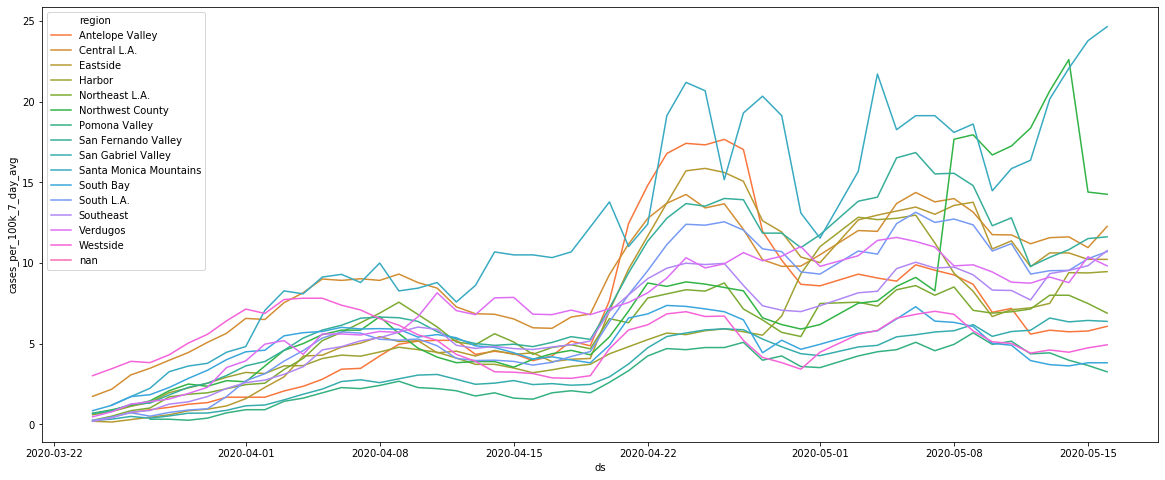

In [91]:
import seaborn as sns
plt.figure(figsize=(20,8))
# sns.lineplot(data=dfg, x='ds', y='cases_7_day_avg', hue='region')
sns.lineplot(data=dfg, x='ds', y='cases_per_100k_7_day_avg', hue='region')



In [42]:
#get historic data 
print(df_final['ds'].min())
print(df_final['ds'].max())

2020-03-18 00:00:00
2020-05-16 00:00:00


In [47]:
dfg['region'].unique()

array(['', 'Antelope Valley', 'Central L.A.', 'Eastside', 'Harbor',
       'Northeast L.A.', 'Northwest County', 'Pomona Valley',
       'San Fernando Valley', 'San Gabriel Valley',
       'Santa Monica Mountains', 'South Bay', 'South L.A.', 'Southeast',
       'Verdugos', 'Westside', 'nan'], dtype=object)